# Entregable 2:

# 1. Business Understanding

##1.1 Contexto y motivación
<div align="justify">
Las personas con limitaciones motoras necesitan canales de control simples, no invasivos y de bajo costo para interactuar con dispositivos del entorno. La lesión medular y otros trastornos neuromotores generan importantes barreras de participación y altos costos sociales y económicos; la OMS estima que más de 15 millones de personas viven con lesión medular a nivel mundial. Cada año entre 250 000 y 500 000 personas sufren una nueva lesión medular[1]. En el Perú esta afección afecta a muchos peruanos, en el 2019, se incremento el ingreso de pacientes debido a lesiones medulares[2]. Además, en un estudio realizado en el 2024, se dio a conocer que gran cantidad de pacientes con esta condición fueron tratados en el Instituto Nacional de Rehabilitación[3]; este acontecimiento evidencia que las lesiones medulares siguen afectando a gran cantidad de peruanos y personas en el mundo entero.
</div>

## 1.2 Solución a la problemática
<div align="justify">
El proyecto se enfocará en la parte de mejorar la calidad de vida de las personas con lesiones medulares, ya que no será un tratamiento para mejorar la salud de los pacientes, sino para mejorar la interacción con el entorno y sociedad. La premisa del proyecto será diseñar una interfaz cerebro-computadora (BCI) capaz de detectar movimientos tanto en manos y pies en canales frontales de EEG en tiempo real y traducirlos a acciones como encender/apagar las luces, mover/confirmar con cursor, entre otras. Los parpadeos son artefactos oculo-palpebrales de gran amplitud y baja frecuencia que se manifiestan con claridad en los electrodos frontales; lejos de solo cumplir su función de limpiar, en el proyecto los aprovechamos como señal de control. Esta no será una tarea facil, porque se deberá identificar que parpadeos fueron voluntarios e involuntarios.
</div>

## 1.3 Señal EEG
<div align="justify">
La señal que utilizaremos para detectar los movimientos será la EEG (electroencefalografía), la cual mide diferencias de potencial eléctrico en la superficie del cuero cabelludo generadas por la actividad cerebral. Los movimientos de extremidades, como abrir y cerrar una mano, ambas manos o ambos pies, producen patrones de activación cortical bien definidos, principalmente en la región motora (electrodos C3, C4 y Cz). Estas señales se caracterizan por cambios en las oscilaciones mu (8–13 Hz) y beta (13–30 Hz), que disminuyen de amplitud durante la preparación y ejecución del movimiento, fenómeno conocido como desincronización relacionada a eventos (ERD). Dado que los cambios se concentran en regiones motoras específicas, incluso con un número reducido de canales en zona central puede ser suficiente para detectar la intención o ejecución del movimiento con una complejidad computacional baja a moderada [4].
</div>

## 1.4 Objetivos
+ Diseñar e implementar un pipeline de procesamiento de señales EEG que detecte movimiento de extremidades en tiempo real desde canales frontales.
+ Validar el algoritmo con datasets públicos.
+ Entrenar y evaluar clasificadores de aprendizaje automático (ej. LDA, SVM, redes neuronales ligeras) que discriminen entre movimiento e inactividad.
+ Implementar una interfaz cerebro-computadora (BCI) funcional en tiempo real que traduzca los movimientos detectados en comandos para un dispositivo externo (ej. cursor, actuador simple).
+ Analizar la factibilidad de usar canales frontales como alternativa simplificada para aplicaciones portátiles o de bajo costo.

## 1.5 Alcances y requisitos
+ Software (preprocesado, detección, clasificación simple y mapeo de posibles acciones)
+ No invasivo, seguro, bajo costo; latencia y consumo moderados (posible ejecución en laptop/embebido).
+ Privacidad: datos EEG considerados sensibles → anonimización, consentimiento informado, control de acceso.


## 1.6 Stakeholders
+ Estudiantes y/o investigadores: obtención de código y reportes realizados.
+ Profesores del curso: evaluación académica de los alumnos.
+ Un interesado a futuro serían las personas que sufren de lesiones motoras y sus familiares, ya que por ahora no se piensa realizar el hardware del proyecto y solo se quedaría como una idea posiblemente funcional.

# 2 Data Understanding

## 2.1 Propiedades de la señal EGG

### 2.1.1 Morfología y física de movimientos de extremidades en EEG
<div align="justify">
Fenómeno físico: la ejecución o imaginación de movimientos voluntarios de extremidades (como abrir y cerrar una mano o ambos pies) genera cambios en la actividad eléctrica de la corteza motora primaria y áreas relacionadas. Estos cambios se manifiestan como modulaciones de los ritmos mu (8–13 Hz) y beta (13–30 Hz), principalmente en electrodos centrales (C3, C4, Cz), dependiendo de la extremidad involucrada. [6]

Duración típica: la desincronización relacionada a eventos (ERD) comienza unos cientos de milisegundos antes del inicio del movimiento y puede extenderse durante toda la ejecución (≈0.5–2 s), seguida de una resincronización (ERS) posterior al movimiento.

Amplitud: los cambios de amplitud en EEG motor son más sutiles que los artefactos oculares, con variaciones típicas en el rango de 5–30 µV sobre la línea base. Aunque menores en magnitud, su consistencia espacial y espectral en región central los hace detectables mediante filtrado en bandas mu y beta, o análisis de potencia espectral.[6]

Espectro: la energía se concentra en las bandas mu (8–13 Hz) y beta (13–30 Hz). El movimiento reduce transitoriamente la potencia de estas bandas (ERD), mientras que tras finalizar la acción puede observarse un rebote de la actividad beta (ERS). Por ello, un análisis en estas bandas resulta fundamental para discriminar la actividad motora de fondo rítmico y otros artefactos. [8]
</div>

## 2.2 Datasets públicos encontrados
+ En la revisión de datasets públicos, se identificaron varios que contienen registros de EEG relevantes para la detección de eventos como parpadeo, movimiento de extremidades, etc. Entre ellas se destacan:
  + EEG Motor Movement/Imagery Dataset (EEGMMIDB) – PhysioNet:
  Contiene registros EEG de 64 canales, obtenidos de 109 sujetos, con una frecuencia de muestreo de 160 Hz. Cada participante completó 14 sesiones, de las cuales 12 corresponden a tareas de imaginería motora, incluyendo movimientos imaginados de mano izquierda, mano derecha, ambas manos y pies. Los datos están almacenados en formato EDF+ e incluyen canales de anotación con los eventos experimentales.

  + EEG Dataset of 7-day Motor Imagery BCI – IEEE DataPort: Este dataset recopila información de 20 voluntarios sanos que participaron en sesiones repetidas de imaginería motora a lo largo de siete días consecutivos. Las tareas incluidas abarcan movimientos imaginados de mano izquierda, mano derecha, pies y una condición de reposo (“idle”). Cada sesión está estructurada en seis runs, con 40 ensayos en total (10 por tarea).

### 2.2.1 Criterios para la selección del dataset

+ Para este proyecto se seleccionó el EEGMMIDB de PhysioNet considerando los siguientes criterios:

  + Disponibilidad y acceso: es un dataset público, gratuito y respaldado por una institución reconocida (PhysioNet/MIT).

  + Cantidad de sujetos: incluye una muestra amplia (109 participantes), lo que permite generalizar mejor los hallazgos.

  + Calidad y detalle de los datos: registros multicanal (64 electrodos), anotaciones de eventos experimentales y formato estandarizado (EDF+).

  + Relevancia para el objetivo: contiene condiciones de línea base de ojos abiertos y ojos cerrados, adecuadas para entrenar y validar algoritmos de detección de parpadeo.

  + Compatibilidad con herramientas de análisis: el formato EDF es ampliamente soportado en Python (MNE, pyEDFlib, etc.), facilitando la etapa de EDA y modelado.

### 2.2.2 Calidad de datos y chequeos iniciales

La base de datos elegida cuenta con más de 1500 mediciones EEG de entre uno a dos minutos.

Participaron 109 pacientes a los cuales se les pidieron realizar diversas tareas en 14 "runs", la data se adquirió usando un EEG de 64 canales usando el sistema BCI2000


Las tareas a realizar fueron las siguientes:

 - Aparece un objetivo en el lado izquierdo o derecho de la pantalla. El sujeto abre y cierra el puño correspondiente hasta que el objetivo desaparece. Luego, el sujeto se relaja.
 - Aparece un objetivo en el lado izquierdo o derecho de la pantalla. El sujeto imagina abrir y cerrar el puño correspondiente hasta que el objetivo desaparece. Luego, el sujeto se relaja.
 - Aparece un objetivo en la parte superior o inferior de la pantalla. El sujeto abre y cierra ambos puños (si el objetivo está en la parte superior) o ambos pies (si el objetivo está en la parte inferior) hasta que el objetivo desaparece. Luego, el sujeto se relaja.
 - Aparece un objetivo en la parte superior o inferior de la pantalla. El sujeto imagina abrir y cerrar ambos puños (si el objetivo está en la parte superior) o ambos pies (si el objetivo está en la parte inferior) hasta que el objetivo desaparece. Luego, el sujeto se relaja.

De las 14 runs se hizo lo siguiente:

 - Run 1: Línea base, ojos abierto
 - Run 2. Línea base, ojos cerrados
 - Run 3: Tarea 1 (abrir y cerrar el puño izquierdo o derecho)
 - Run 4: Tarea 2 (imaginar abrir y cerrar el puño izquierdo o derecho)
 - Run 5: Tarea 3 (abrir y cerrar ambos puños o ambos pies)
 - Run 6: Tarea 4 (imaginar abrir y cerrar ambos puños o ambos pies)
 - Run 7: Tarea 1
 - Run 8: Tarea 2
 - Run 9: Tarea 3
 - Run 10: Tarea 4
 - Run 11: Tarea 1
 - Run 12: Tarea 2
 - Run 13: Tarea 3
 - Run 14: Tarea 4

Por lo que las runs que nos interesan serán las que:

- Pensar en abrir y cerrar mano derecha
- Pensar en abrir y cerrar mano izquierda
- Pensar en abrir y cerrar ambas manos
- Pensar en abrir y cerar los pies

En resumen, las runs 4, 6, 8, 10, 12, 14

Los datos se proporcionan aquí en formato EDF+ (que contiene 64 señales de EEG, cada una muestreada a 160 muestras por segundo, y un canal de anotaciones). Los archivos .event y los canales de anotación en los archivos .edf correspondientes contienen datos idénticos.

Cada anotación incluye uno de tres códigos (T0, T1 o T2):

 - T0 corresponde al reposo
 - T1 corresponde al inicio del movimiento (real o imaginado) de:
   - el puño izquierdo (en las ejecuciones 3, 4, 7, 8, 11 y 12)
   - ambos puños (en las ejecuciones 5, 6, 9, 10, 13 y 14)
 - T2 corresponde al inicio del movimiento (real o imaginado) de:
   - el puño derecho (en las ejecuciones 3, 4, 7, 8, 11 y 12)
   - ambos pies (en las ejecuciones 5, 6, 9, 10, 13 y 14)

### 2.2.3 Preprocesado



In [1]:
#Instalamos librerías
pip install --upgrade mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.3 MB/s eta 0:00:00


In [3]:
#Importamos liberías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import os
from pathlib import Path
import pickle
from typing import Dict, List, Tuple, Optional
import logging

Sabemos que el dataset consta de 14 runs de uno a tres minutos de 109 pacientes, eso hace que el dataset pese 1.9 Gb comprimido y más de 3 Gb sin comprimir, por lo que para la etapa de preprocesamiento y validación de datos se usarán 5 pacientes.

In [4]:
# Carpeta base de destino
base_dir = "./eeg_data"
os.makedirs(base_dir, exist_ok=True)

# Número de pacientes
num_pacientes = 5
pacientes = [f"S{str(i).zfill(3)}" for i in range(1, num_pacientes+1)]

# Descagarmos los runs que necesitamos
runs = ["R04", "R06", "R08","R10","R12","R14"]

# Base URL de PhysioNet
base_url = "https://physionet.org/files/eegmmidb/1.0.0/"

for paciente in pacientes:
    paciente_dir = os.path.join(base_dir, paciente)
    os.makedirs(paciente_dir, exist_ok=True)

    for run in runs:
        for ext in [".edf", ".edf.event"]:
            filename = f"{paciente}{run}{ext}"
            url = f"{base_url}{paciente}/{filename}"
            cmd = f"wget -nc -P {paciente_dir} {url}"
            print("Descargando:", url)
            os.system(cmd)

Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R06.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R06.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R08.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R08.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R10.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R10.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R12.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R12.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R14.edf
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S001/S001R14.edf.event
Descargando: https://physionet.org/files/eegmmidb/1.0.0/S002/S002R04.edf
Descargando: ht

Recordar que:
 - Runs 4, 8 y 12: Imaginando abrir y cerrar mano derecha o izquierda
 - Runs 6, 10 y 14: Imaginando abri y cerrar ambas manos o ambos pies

---

 - Etiqueta T0 (1): Descanso
 - Etiqueta T1 (2):
    - Mano izquierda (Run 4, 8, 12)
    - Ambas manos (Run 6, 10, 14)
 - Etiqueta T2 (3):
   - Mano derecha (Run 4, 8, 12)
   - Ambos pies (Run 6, 10, 14)

In [7]:
#Elegiremos al run 4 (Imaginar abrir y cerrar la mano izquierda o derecha)
#Se declararán las variables con los datos en bruto del EEG
rawS1R4 = mne.io.read_raw_edf("/content/eeg_data/S001/S001R04.edf", preload=True)
rawS2R4 = mne.io.read_raw_edf("/content/eeg_data/S001/S001R04.edf", preload=True)
rawS3R4 = mne.io.read_raw_edf("/content/eeg_data/S001/S001R04.edf", preload=True)
rawS4R4 = mne.io.read_raw_edf("/content/eeg_data/S001/S001R04.edf", preload=True)
rawS5R4 = mne.io.read_raw_edf("/content/eeg_data/S001/S001R04.edf", preload=True)

Extracting EDF parameters from /content/eeg_data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/eeg_data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/eeg_data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/eeg_data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/eeg_data/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19

In [8]:
#Extraer metadatos
info = rawS1R4.info
print("Número de canales:", info['nchan'])
print("Canales:", rawS1R4.ch_names[:10], "...")  # solo mostramos los primeros 10, si no salen los 64 canales
print("Frecuencia de muestreo:", info['sfreq'], "Hz")
print("Duración (s):", rawS1R4.n_times / info['sfreq'])

#Extraer datos (convertir a µV)
data, times = rawS1R4[:, :]   # (n_canales, n_muestras)
data_uV = data * 1e6 #Esta variable almacenará los valores de voltaje medidos

Número de canales: 64
Canales: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..'] ...
Frecuencia de muestreo: 160.0 Hz
Duración (s): 125.0


In [9]:
# Estadísticas básicas de los primeros 5 canales
stats = {
    "Canal": rawS1R4.ch_names[:5],
    "Media (µV)": np.mean(data_uV[:5], axis=1),
    "STD (µV)": np.std(data_uV[:5], axis=1),
    "Mín (µV)": np.min(data_uV[:5], axis=1),
    "Máx (µV)": np.max(data_uV[:5], axis=1)
}
df_stats = pd.DataFrame(stats)
print("\nEstadísticas básicas (primeros 5 canales):")
print(df_stats)


Estadísticas básicas (primeros 5 canales):
  Canal  Media (µV)   STD (µV)  Mín (µV)  Máx (µV)
0  Fc5.     0.13915  56.565173    -223.0     284.0
1  Fc3.     1.60085  54.917808    -213.0     245.0
2  Fc1.     1.91985  55.584212    -205.0     232.0
3  Fcz.     1.91160  56.711861    -201.0     241.0
4  Fc2.     0.78605  52.818553    -201.0     212.0


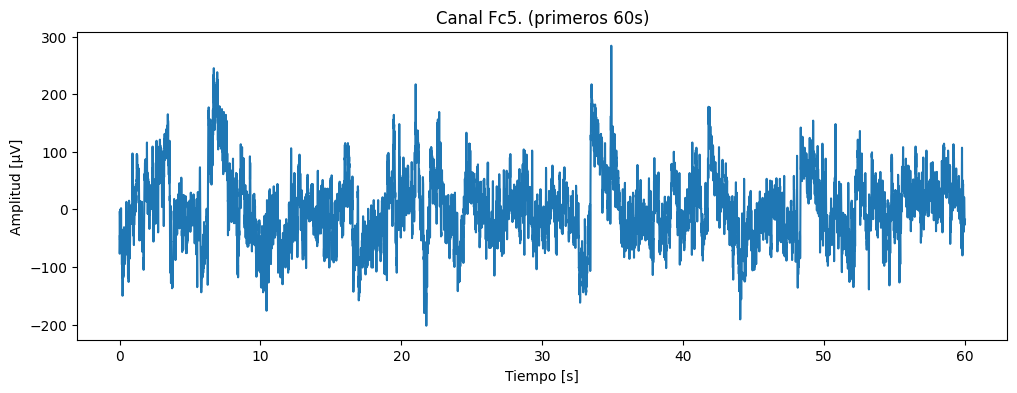

In [11]:
#Graficar un segmento de 5 segundos del primer canal
fs = int(info['sfreq'])
segundos = 60
muestras = round(fs * segundos)

plt.figure(figsize=(12,4))
plt.plot(times[:muestras], data_uV[0, :muestras])
plt.title(f"Canal {rawS1R4.ch_names[0]} (primeros {segundos}s)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [µV]")
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/tmp/ipython-input-3564599002.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawS1R4.plot_psd(fmax=60)  # hasta 60 Hz para ver alfa, beta, etc.


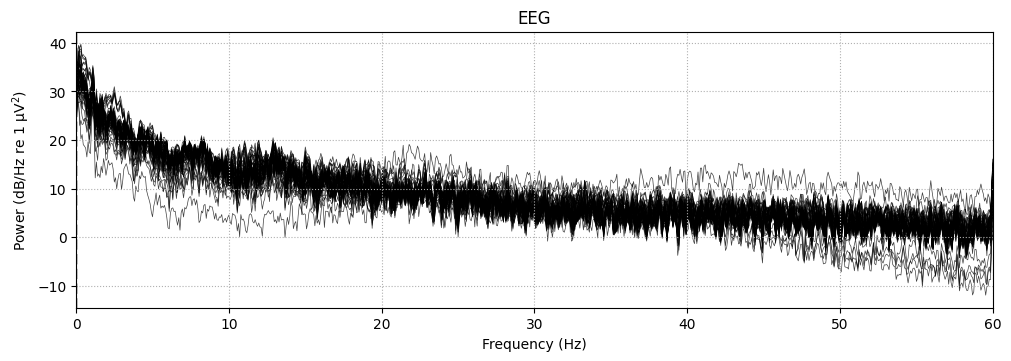

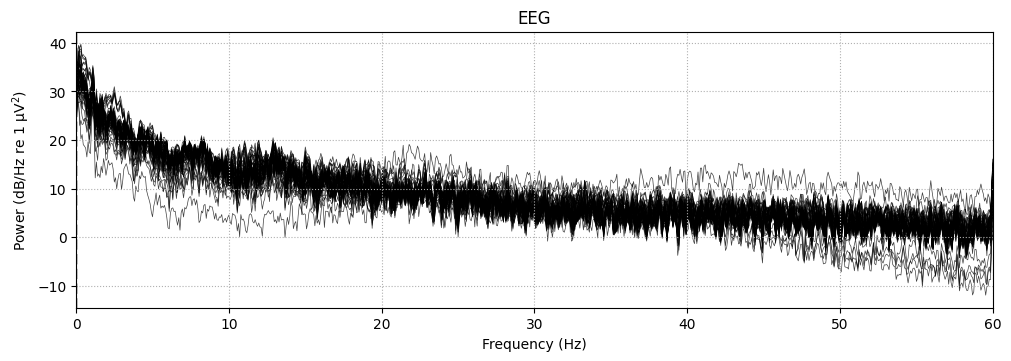

In [12]:
# === 5. PSD (espectro de potencias) ===
rawS1R4.plot_psd(fmax=60)  # hasta 60 Hz para ver alfa, beta, etc.

Las anotaciones nos dicen en qué instante de tiempo ocurrió un evento, están en una matriz de Nx3, donde N es el número de eventos.

- La primera columna es el sample del vector tiempo en donde ocurre el evento
- La segunda columna es siempre "0"
- La tercera columna nos dice el tipo de evento:
   - Etiqueta T0 (1): Descanso
   - Etiqueta T1 (2):
      - Mano izquierda (Run 4, 8, 12)
      - Ambas manos (Run 6, 10, 14)
   - Etiqueta T2 (3):
      - Mano derecha (Run 4, 8, 12)
      - Ambos pies (Run 6, 10, 14)


In [13]:
events, event_id = mne.events_from_annotations(rawS1R4)
print(events[:10]) #Primeros 10 eventos
print(event_id)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
[[   0    0    1]
 [ 672    0    3]
 [1328    0    1]
 [2000    0    2]
 [2656    0    1]
 [3328    0    2]
 [3984    0    1]
 [4656    0    3]
 [5312    0    1]
 [5984    0    3]]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


Como se puede apreciar se genera la matriz de eventos.

Se aprecia por ejemplo que en el sample 2000 ocurrió el evento 2, o sea T1, al estar en el run 4, podemos concluir que en ese instante el paciente pensó en abrir y cerrar la mano izquierda.

In [15]:
#Para obtener el segundo en donde ocurrió un evento se haría:

# Ejemplo: cuarto evento
first_event_sample = events[3, 0]
time_in_seconds = first_event_sample / rawS1R4.info['sfreq']
print("Evento en segundo:", time_in_seconds)

Evento en segundo: 12.5



### 2.2.4 Estrategia de validación
Para este dataset se podría usar:

 - Intra-sujeto (S001) – Leave-One-Run-Out (LORO)

    Divide por corridas (R03, R07, R11…). En cada iteración, deja una corrida completa como test y entrena con las otras.

    Ventaja: evalúa generalización entre sesiones del mismo sujeto, evitando autocorrelación de ventanas cercanas.

 - Intra-sujeto – K-fold por ensayos

    K-fold estratificado a nivel de trials/epochs, asegura que ventanas solapadas no caigan en folds distintos (agrupar por evento).

    Útil para tuning rápido, pero menos estricto que LORO.

- Inter-sujeto – Leave-One-Subject-Out (LOSO)

    Entrena en S002–S109 y prueba en S001 (rota sobre todos).

    Mide la generalización a personas nuevas, el escenario más exigente/realista.
### 2.2.5 Métricas específicas para detección de eventos

De las métricas útiles para la detección de los datos son:

+ Exactitud: proporción de predicciones correctas en relación con el total de casos evaluados.

+ Sensibilidad (True Positive Rate): mide la capacidad del modelo para identificar correctamente los casos positivos.

+ Precisión: proporción de eventos detectados que corresponden efectivamente a lo buscado.

+ Especificidad (True Negative Rate): mide la capacidad del modelo para reconocer correctamente los casos negativos.

+ F1-Score: indicador que combina precisión y sensibilidad en una sola medida equilibrada.

+ Tiempo de detección (Latencia): tiempo que tarda el sistema en detectar o responder a un evento.

+ Tasa de falsos positivos: proporción de casos negativos que el modelo clasifica erróneamente como positivos.

### 2.2.6 Ética de manejo de los datos

Es importante considerar que los datos provienen de seres humanos, por lo que se debe tener cuidado con la manera en que se presentan.

+ Anonimización: los datasets utilizados (como EEGMMIDB) eliminan toda información personal identificable, garantizando la confidencialidad de los sujetos.

+ Consentimiento informado: los datos provienen de estudios donde los participantes dieron su consentimiento explícito para la recolección y publicación con fines de investigación.

+ Uso responsable: los datos deben emplearse exclusivamente en proyectos académicos o de investigación, evitando aplicaciones que comprometan la privacidad o integridad de los participantes.

+ Reproducibilidad y transparencia: al tratarse de repositorios públicos, se fomenta la apertura científica y la posibilidad de replicar resultados.

+ Limitaciones: aunque los datos son abiertos, no deben extrapolarse indiscriminadamente a contextos clínicos sin validación adicional.

## Bibliografía
- [1]“Lesiones medulares,” wWw.who.int. https://www.who.int/es/news-room/fact-sheets/detail/spinal-cord-injury
- [2]“Instituto de Rehabilitación registra incremento de pacientes con lesiones medulares,” Www.gob.pe, 2019. https://www.gob.pe/institucion/minsa/noticias/45224-instituto-de-rehabilitacion-registra-incremento-de-pacientes-con-lesiones-medulares (visitado en Sep. 02, 2025).
- [3]“Instituto Nacional de Rehabilitación brindó más de 1500 atenciones en consulta médica a pacientes con diagnóstico de lesión medular,” Www.gob.pe, 2024. https://www.gob.pe/institucion/minsa/noticias/975047-instituto-nacional-de-rehabilitacion-brindo-mas-de-1500-atenciones-en-consulta-medica-a-pacientes-con-diagnostico-de-lesion-medular
- [4]W.-D. Chang, H.-S. Cha, K. Kim, and C.-H. Im, “Detection of eye blink artifacts from single prefrontal channel electroencephalogram,” Computer Methods and Programs in Biomedicine, vol. 124, pp. 19–30, Feb. 2016, doi: https://doi.org/10.1016/j.cmpb.2015.10.011.
- [5]D. L. T. MD, “What is Bell’s Phenomenon?,” News-Medical, Mar. 27, 2019. https://www.news-medical.net/health/What-is-Bells-Phenomenon.aspx
- [6]“EEG Artifacts: Overview, Physiologic Artifacts, Extraphysiologic Artifacts,” Medscape.com, Nov. 09, 2019. https://emedicine.medscape.com/article/1140247-overview
- [7]E. B. Lange and L. Fink, “Eye blinking, musical processing, and subjective states—A methods account,” Psychophysiology, vol. 60, no. 10, Jun. 2023, doi: https://doi.org/10.1111/psyp.14350.
- [8]A. Egambaram, N. Badruddin, V. S. Asirvadam, T. Begum, E. Fauvet, and C. Stolz, “Online detection and removal of eye blink artifacts from electroencephalogram,” Biomedical Signal Processing and Control, vol. 69, p. 102887, Aug. 2021, doi: https://doi.org/10.1016/j.bspc.2021.102887.
- [9]Chiara-Camilla Derchi et al., “Distinguishing intentional from nonintentional actions through eeg and kinematic markers,” Scientific Reports, vol. 13, no. 1, May 2023, doi: https://doi.org/10.1038/s41598-023-34604-y.


## Aportes al  laboratorio 2
- Leon Achata 33.33 %
- Nicolas Arango 33.33 %
- Hans Navarro 33.33 %
